In [1]:
from rdkit import Chem
import pandas as pd

In [8]:
inchi_path = './inchi.csv'
inchi_file = pd.read_csv(inchi_path)

smiles_path = './smiles.csv'
smiles_df = pd.DataFrame(columns=['ID', 'SMILES'])

In [ ]:
i = 0
for idx, items in inchi_file.iterrows():
    inchi = items['InChi']
    mol = Chem.MolFromInchi(inchi)
    if(mol == None):
        continue
    canonical_smiles = Chem.MolToSmiles(mol)
    
    smiles_df.loc[i] = [items['ID'], canonical_smiles]
    i += 1

In [10]:
smiles_df.to_csv(smiles_path, index=False)

CC[N+](C)(C)Cc1ccccc1Br


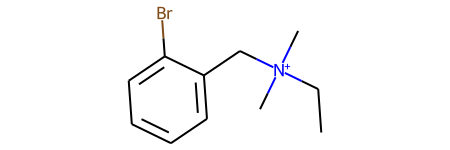

In [30]:
mol = Chem.MolFromInchi('InChI=1S/C11H17BrN/c1-4-13(2,3)9-10-7-5-6-8-11(10)12/h5-8H,4,9H2,1-3H3/q+1')
canonical_smiles = Chem.MolToSmiles(mol)
print(canonical_smiles)
mol

Merge spectral data and SMILES

In [11]:
data_path = './dataset/normData_1647.csv'
data_df = pd.read_csv(data_path)

smiles_df = pd.read_csv(smiles_path)

dataset_df = pd.merge(data_df, smiles_df, left_on='ID', right_on='ID', how='inner')
print(len(dataset_df))
dataset_df.head()

8272


,ID,552.0,554.0,556.0,558.0,560.0,562.0,564.0,566.0,568.0,...,3828.0,3830.0,3832.0,3834.0,3836.0,3838.0,3840.0,3842.0,3844.0,SMILES
0,C100005,0.029260,0.023569,0.019171,0.015573,0.012292,0.009177,0.006424,0.005279,0.006629,...,0.005490,0.005979,0.007471,0.008777,0.008708,0.007778,0.006851,0.006479,0.006781,O=[N+]([O-])c1ccc(Cl)cc1
1,C100016,0.035241,0.036682,0.037450,0.038118,0.039253,0.040991,0.042732,0.044132,0.045326,...,0.004158,0.004427,0.004746,0.005077,0.005286,0.005342,0.005306,0.005308,0.005487,Nc1ccc([N+](=O)[O-])cc1
2,C100027,0.008138,0.006244,0.006024,0.007444,0.010127,0.012343,0.012753,0.012943,0.014619,...,0.001887,0.001744,0.002265,0.003044,0.003619,0.003944,0.004098,0.004244,0.004565,O=[N+]([O-])c1ccc(O)cc1
3,C100061,0.046016,0.056510,0.061454,0.065510,0.072153,0.080110,0.087405,0.094010,0.100134,...,0.001283,0.001611,0.002109,0.002711,0.003295,0.003611,0.003474,0.003111,0.002847,COc1ccc(C(C)=O)cc1
4,C1000868,0.036377,0.027100,0.018148,0.013700,0.016130,0.020600,0.022080,0.022000,0.022936,...,0.007910,0.008100,0.008237,0.008000,0.007206,0.006300,0.005777,0.005700,0.006023,C=C(C)C=C(C)C


In [12]:
dataset_df.to_csv('./dataset/dataset_1647_SMILES.csv', index=False)